# Plotting module in sympy
First, as in every new kernel, you should start with setting up the environment, as explained in the first part.

In [1]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

This line ensures that the plots are shown below the cell. If instead of _inline_ it would say _auto_ the plots would open in a new window - will be used with 3d plots.

In [2]:
%matplotlib inline

In [3]:
p,q = symbols("x, y", real=True)

## plot() function
In sympy, there is a plot module. You can plot one or more functions, specify ranges to the whole plot or just individual plots.

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.1
> #### Given inverse demand function $ p = 12 - 2q $ and inverse supply $ p = 5 + 1/2q $, plot demand, demand and supply, set range of visible plot. How will the plot look if q>5, price is constantly 7.5?

In [4]:
demand = 12 - 2*q
supply = 5 + 1/2*q

#### one plot

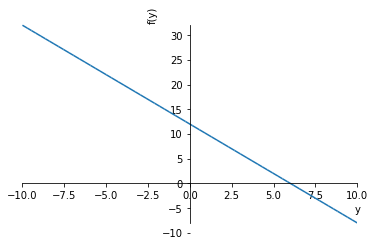

In [5]:
plot(demand)

#### multiple plots

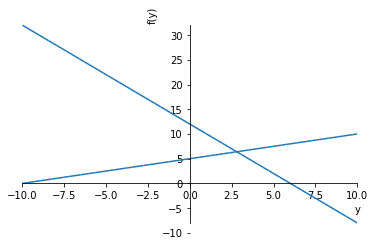

In [6]:
plot(demand, supply)

#### one range in plot

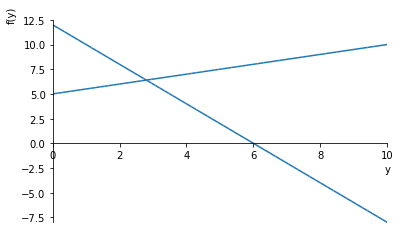

In [7]:
plot(demand , supply, (q, 0, 10))

#### multiple ranges:
above quantity = 5 supply is constant to 7.5

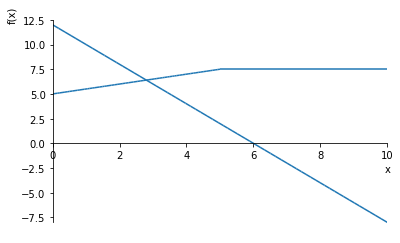

In [8]:
plot((demand, (q,0,10)), (supply, (q, 0, 5)), (7.5, (q, 5, 10)))

### some of other available plot options

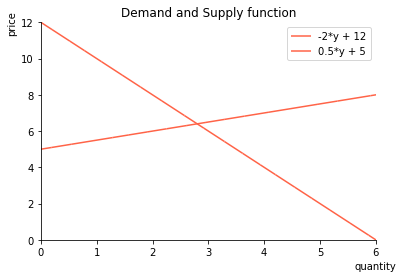

In [9]:
plot(demand , supply,
     xlim=(0,6), ylim=(0,12),
     line_color='tomato',
     xlabel='quantity', ylabel='price',
     title='Demand and Supply function',
     axis_center='auto', legend=True)

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.2
> #### Plot aggregate demand of person A and B for a private good.

In [10]:
# demand of person A
demandA = 2 - q
# demand of person B
demandB = 4 - q

In [11]:
# where is the price for demand A equal 0 (cuts Y axis)?
demandAequal0 = solve(demandA)[0]
demandAequal0

In [12]:
# 
demandAp = solve(demandA - p, q)[0]
demandBp = solve(demandB - p, q)[0]

Aggdem = solve(demandAp + demandBp-q, p)[0]

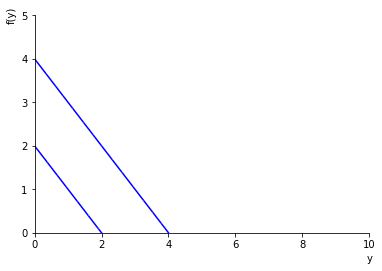

In [13]:
basic = plot(demandA, demandB,
             xlim = (0,10),
             ylim = (0,5),
             line_color='blue')

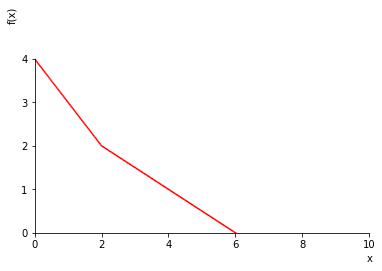

In [14]:
aggregate = plot((Aggdem, (q, demandAequal0, 10)),
                 (demandB, (q, 0, demandAequal0)),
                 ylim = (0,5),
                 line_color='red')

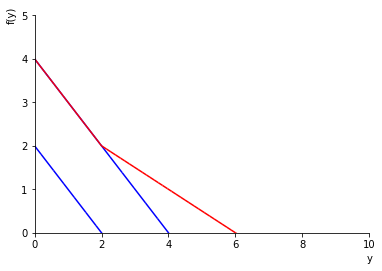

In [15]:
basic.extend(aggregate)
basic.show()

#### <left><img src='https://image.flaticon.com/icons/svg/179/179386.svg' width="25px"></left> What is the difference between _append()_ and _extend()_ for plots?

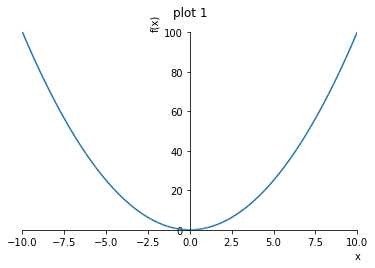

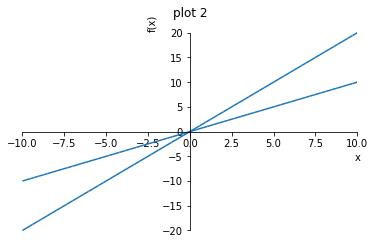

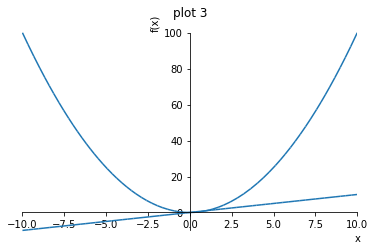

In [16]:
# append - it adds only a specific plot with p2
x = symbols('x')
p1 = plot(x*x, title="plot 1")
p2 = plot(x, 2*x, title="plot 2")
p1.append(p2[0])
p1.title = "plot 3"
p1.show()

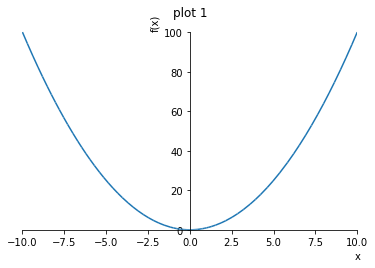

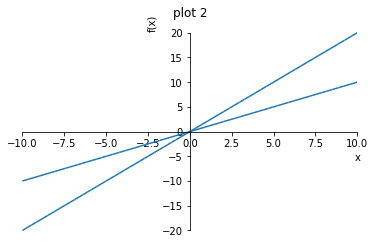

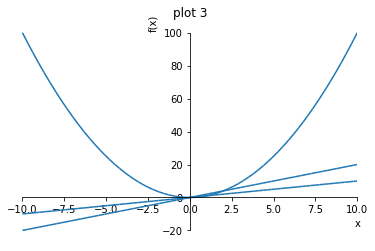

In [17]:
# extend - it adds all plots from p2
x = symbols('x')
p1 = plot(x*x, title="plot 1")
p2 = plot(x, 2*x, title="plot 2")
p1.extend(p2)
p1.title = "plot 3"
p1.show()

## plotting.plot3d()

In [18]:
#print only last element
InteractiveShell.ast_node_interactivity = "last"

# changing to auto to enable window to pop, can be necessary to run twice to work
%matplotlib auto

Using matplotlib backend: Qt5Agg


plot opens in new window, possibility of rotating and setting parameters (works on MS Edge, Windows 10)

In [19]:
x, y = symbols("x, y")

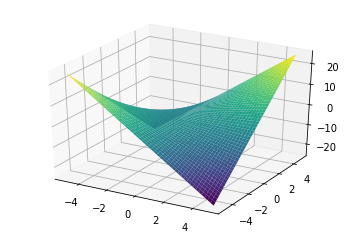

In [20]:
plotting.plot3d(x*y, (x, -5, 5), (y, -5, 5))

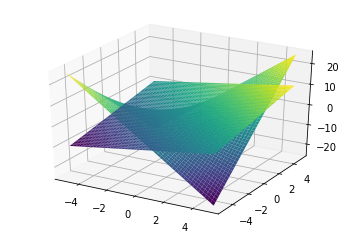

In [21]:
plotting.plot3d(x*y, x+y, (x, -5, 5), (y, -5, 5))

## Plotting the Batman function - just for fun

<img src='https://images-na.ssl-images-amazon.com/images/I/41Vd-ON7ZFL._SX425_.jpg' width="250"/>

In [22]:
eq_circle_down = solve(Eq( (x/7)**2 + (y/3)**2 - 1),y)[0]
eq_circle_down_left = (eq_circle_down,(x,-7,-4))
eq_circle_down_right = (eq_circle_down,(x,4,7))

eq_circle_up = solve(Eq( (x/7)**2 + (y/3)**2 - 1),y)[1]
eq_circle_up_left = (eq_circle_up,(x,-7,-3))
eq_circle_up_right = (eq_circle_up,(x,3,7))

In [23]:
eq_tail = Abs(x/2) - ((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(Abs(Abs(x)-2)-1)**2)
eq_tail = (eq_tail,(x,-4,4))

In [24]:
eq_inner_wing = 6*sqrt(10)/7-0.5*Abs(x)+1.5-3*sqrt(10)/7*sqrt(4-(Abs(x)-1)**2)
eq_inner_wing_left = (eq_inner_wing,(x,-3,-1))
eq_inner_wing_right = (eq_inner_wing,(x,1,3))

In [25]:
eq_head_sides = 9-8*Abs(x)
eq_head_sides_left = (eq_head_sides,(x,-1,-0.75))
eq_head_sides_right = (eq_head_sides,(x,0.75,1))

In [26]:
eq_head_top = 2.25
eq_head_top = (eq_head_top,(x,-0.5,0.5))

In [27]:
eq_ears = 3*Abs(x)+0.75
eq_ears_left = (eq_ears,(x,-0.75,-0.5))
eq_ears_right = (eq_ears,(x,0.5,0.75))

In [28]:
eq_circle_down_left
eq_circle_down_right
eq_circle_up_left
eq_circle_up_right
eq_tail
eq_inner_wing_left
eq_inner_wing_right
eq_head_sides_left
eq_head_sides_right
eq_head_top
eq_ears_left
eq_ears_right

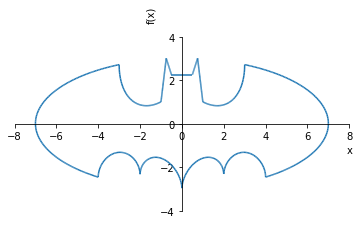

In [29]:
plot(eq_circle_down_left, eq_circle_down_right,
     eq_circle_up_left, eq_circle_up_right,
     eq_tail,
     eq_inner_wing_left, eq_inner_wing_right,
     eq_head_sides_left, eq_head_sides_right,
     eq_head_top,
     eq_ears_left, eq_ears_right,
     xlim=(-8,8), ylim=(-5,5))